In [15]:
from keras import utils
import matplotlib.pyplot as plt

from generation.gaugan import GauganPredictor
from segmentation.unet import UnetModel
from convert import convert_mc2real

In [ ]:
generator = GauganPredictor(
    'generation/trained_models/generator.h5',
    'generation/trained_models/encoder.h5'
)

In [4]:
segmentator = UnetModel()
segmentator.load_weights('segmentation/trained_models/unet.h5')

In [8]:
dataset = utils.image_dataset_from_directory(
    directory='data/1/minecraft',
    image_size=(256, 256),
    labels=None,
    batch_size=1,
)

Found 580 files belonging to 1 classes.


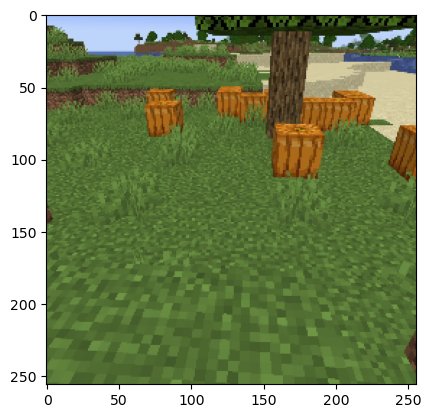

In [44]:
mc_image = next(iter(dataset))[0].numpy() / 255
plt.imshow(mc_image)

2023-06-29 01:54:58.295909: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [1,256,256,25]
	 [[{{node Placeholder/_1}}]]


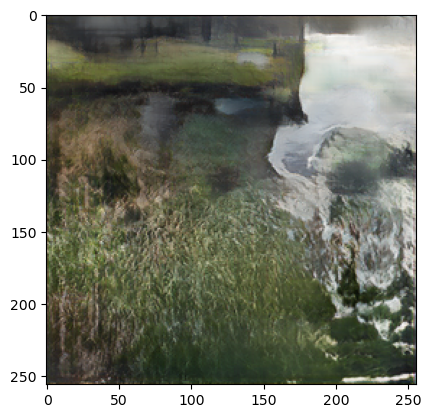

In [45]:
real_image = convert_mc2real(mc_image, generator, segmentator)
plt.imshow(real_image)